In [16]:
from configure_dataframes import directory_to_dataframe
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm

In [160]:
IMG_SHAPE = (256, 256)
METHOD = lambda x: np.quantile(x, 0.25, axis=0)
METHOD = lambda x: np.average(x, axis=0)

In [161]:
df = directory_to_dataframe("data")

In [190]:
df = df.groupby("instrument").sample(n=500, random_state=42).reset_index(drop=True)

In [197]:
background_images = {}
images = []
for instrument in df.instrument.unique():
    df_instrument = df[df.instrument == instrument]
    total_img = len(df_instrument)
    empty_img = np.zeros((IMG_SHAPE))
    for idx, row in df_instrument.iterrows():
        img = Image.open(row.file_path).convert("L")
        img = np.array(img.resize(IMG_SHAPE))
        # Average of the frequency over time
        empty_img += np.mean(img, axis=0) / total_img
    background_images[instrument] = empty_img

In [198]:
background_images["australia_assa_62"].shape

(256, 256)

In [199]:
df[df.label == "burst"]

,label,start_time,file_path,instrument,burst_type
4,burst,2021-11-11 05:04:00,data/6/2021-11-11 05-04-00_2021-11-11 05-05-00...,australia_assa_01,6
9,burst,2021-10-26 23:31:00,data/6/2021-10-26 23-31-00_2021-10-26 23-32-00...,australia_assa_01,6
11,burst,2021-11-11 07:15:00,data/6/2021-11-11 07-15-00_2021-11-11 07-16-00...,australia_assa_01,6
15,burst,2021-10-29 00:54:00,data/3/2021-10-29 00-54-00_2021-10-29 00-55-00...,australia_assa_01,3
18,burst,2021-10-26 04:22:00,data/6/2021-10-26 04-22-00_2021-10-26 04-23-00...,australia_assa_01,6
...,...,...,...,...,...
1490,burst,2023-05-03 23:09:00,data/3/2023-05-03 23-09-00_2023-05-03 23-10-00...,australia_assa_62,3
1495,burst,2023-04-16 21:46:00,data/6/2023-04-16 21-46-00_2023-04-16 21-47-00...,australia_assa_62,6
1497,burst,2022-09-30 22:38:00,data/3/2022-09-30 22-38-00_2022-09-30 22-39-00...,australia_assa_62,3
1498,burst,2022-01-20 06:01:00,data/2/2022-01-20 06-01-00_2022-01-20 06-02-00...,australia_assa_62,2


In [200]:
background_images[instrument]

array([[59.50150781, 59.48825781, 59.48874219, ..., 59.49264844,
        59.55385938, 59.74322656],
       [59.50150781, 59.48825781, 59.48874219, ..., 59.49264844,
        59.55385938, 59.74322656],
       [59.50150781, 59.48825781, 59.48874219, ..., 59.49264844,
        59.55385938, 59.74322656],
       ...,
       [59.50150781, 59.48825781, 59.48874219, ..., 59.49264844,
        59.55385938, 59.74322656],
       [59.50150781, 59.48825781, 59.48874219, ..., 59.49264844,
        59.55385938, 59.74322656],
       [59.50150781, 59.48825781, 59.48874219, ..., 59.49264844,
        59.55385938, 59.74322656]])

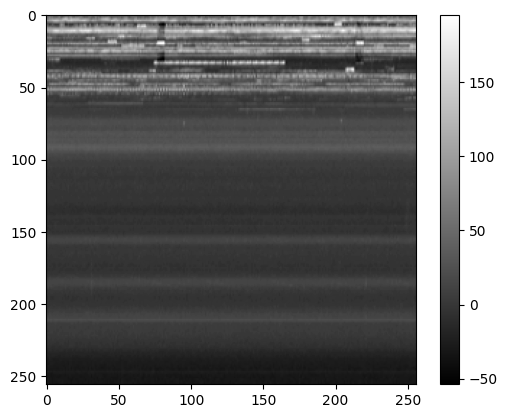

In [212]:
img_idx = 1428
###
instrument = df.iloc[img_idx].instrument
img = Image.open(df.iloc[img_idx].file_path)
img = img.convert("L")
img = img.resize((256, 256))
img = np.array(img)
img_backsub = img - background_images[instrument]
plt.imshow(img_backsub, cmap="gray")
plt.colorbar()

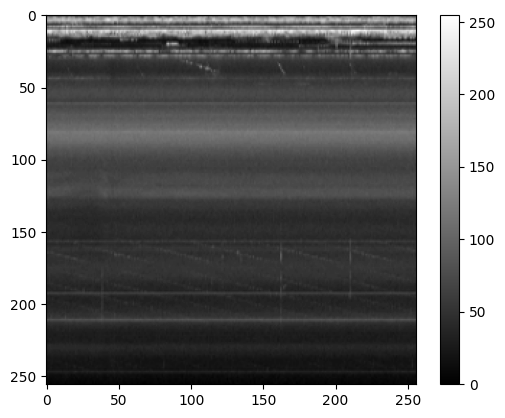

In [202]:
plt.imshow(img, cmap="gray")
plt.colorbar()